# 영상(image)이란?
- 이미지 데이터는 시각적 정보가 포함된 데이터
- 이미지는 픽셀의 집합으로 이루어져 있음
- 각 픽셀은 고유의 색상 값을 가짐
- 이미지의 해상도가 높을수록 픽셀 수가 많아짐
- 픽셀(Pixel): 이미지의 기본 단위, 화소
    - 0 ~ 255 범위의 256개의 정수로 표현(uint8)


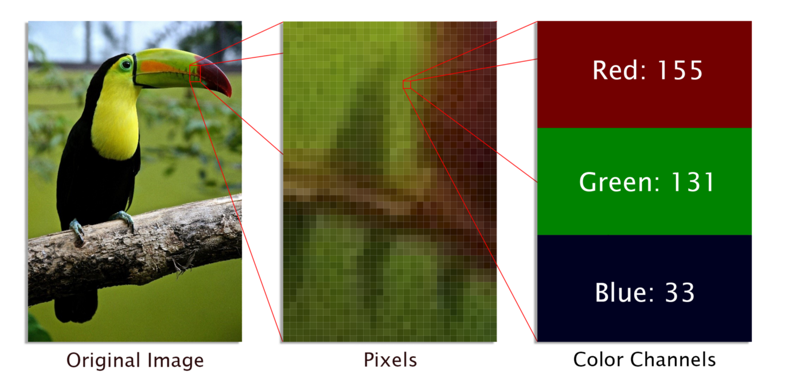

## Grayscale 이미지
- 색상 정보가 없어 오직 밝기 정보만으로 구성된 이미지
- 밝기 정보를 256 단계로 표현


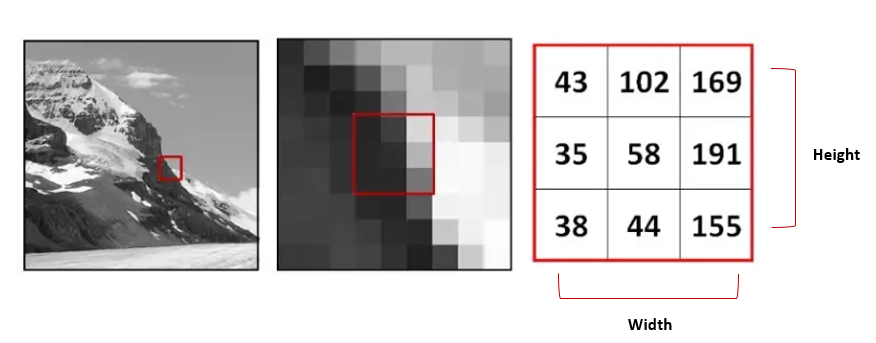

## Truecolor 이미지
- 색상 정보를 가지고 있어 다양한 색상을 표현 할수 있는 이미지
- Red, Green, Blue 각각의 색 성분을 256 단계로 표현
- $256^3$ = 16,777,216 색상 표현 가능


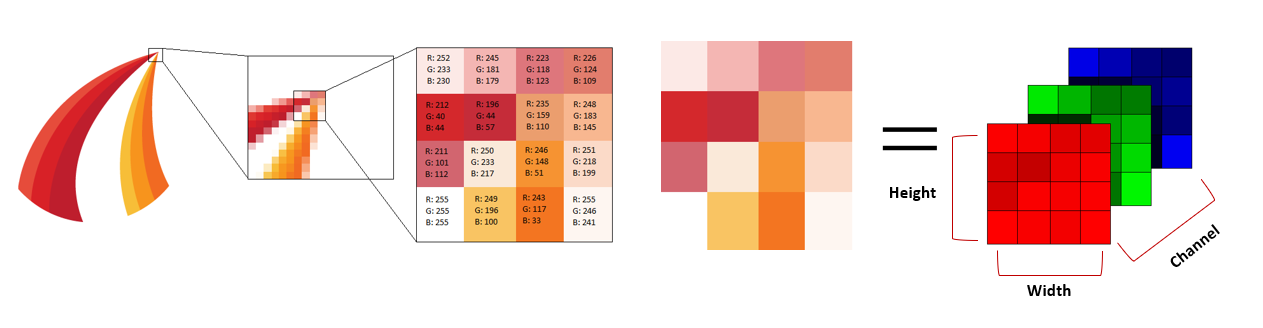

# Fully Connected Network 한계
- 3차원의 데이터인 이미지 데이터도 1차원의 데이터로 변형한 뒤 linear layer 에 입력하여 이미지 형상을 무시


# 합성곱 신경망 (Convolutional Neural Network)
- 이미지 데이터를 다룰 때 주로 CNN을 사용
- 컨볼루션 연산은 이미지의 중요한 특징을 추출하는 과정으로, 모델이 이미지의 특정 패턴, 모서리, 질감 등을 인식할 수 있게 함
- 필터(filter)를 이용하여 합성곱 연산
- 입력 데이터에 필터에 대응하는 원소끼리 곱하고, 그 합을 구한다.
    - 연산이 완료된 결과를 이미지에 부분적으로 특징을 뽑아내서 특징 맵(feature map)이라고도 부른다.
- 필터(filter)
    - 커널(kernel)이라고도 한다.



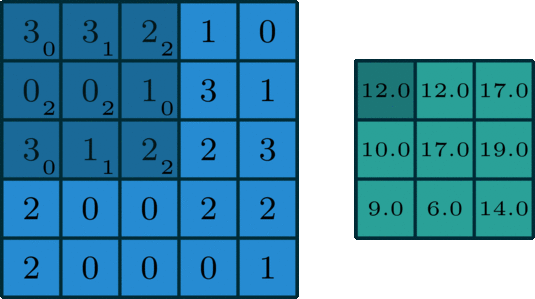

## Padding
- 합성곱 연산을 수행하기 전에 입력데이터 주변을 특정값으로 채우는 것
    - 주로 출력크기를 조정할 목적으로 사용
    - 합성곱 연산을 거칠 때마다 크기가 작아진다. 너무깊게 할경우 출력크기가 1

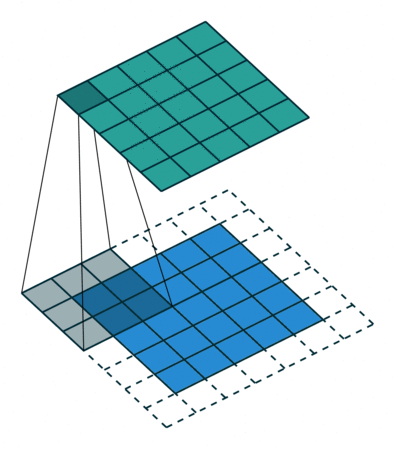

## Stride
- 필터를 적용하는 위치의 간격


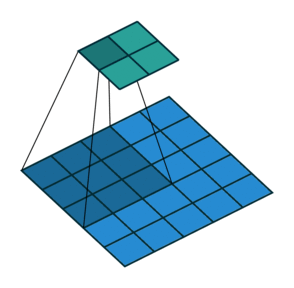

# Pooling
- 세로 및 가로 방향의 공간을 줄이는 연산
- 풀링은 일반적으로 같은 요소가 풀링연산에 재사용되지 않도록 필터 사이즈와 스트라이드 사이즈를 동일하게 한다.


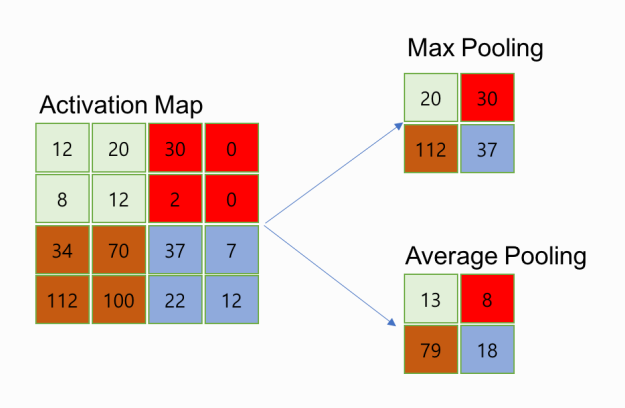

In [2]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [11]:
SEED = 42
DATA_PATH = '../data/cats_and_dogs/'
device = "cuda" if torch.cuda.is_available() else "cpu"

- glob 라이브러리
    - 폴더가 포함된 경로를 파일명과 함께 리스트로 뽑을 때 사용

In [12]:
from glob import glob

cats_list = sorted(glob(f"{DATA_PATH}train/cats/*.jpg"))
dogs_list = sorted(glob(f"{DATA_PATH}train/dogs/*.jpg"))
print(len(cats_list))
print(len(dogs_list))

1000
1000


- 정답 데이터 만들기
    - 고양이: 0
    - 강아지: 1

In [13]:
img_path = cats_list + dogs_list
labels = len(cats_list) * [0] + len(dogs_list) * [1]
len(labels), len(img_path)

(2000, 2000)

In [14]:
train = np.array(img_path)
target = np.array(labels)

np.random.seed(SEED)
idx_list = np.arange(train.shape[0])
np.random.shuffle(idx_list)
np.random.shuffle(idx_list)

train = train[idx_list]
target = target[idx_list]

# open cv
```bash
pip install opencv-python
```

In [15]:
import cv2

## 읽기
- imread 함수
    - ndarray 형태로 반환
    - 이미지 채널 순서를 BGR 순서로 로딩

In [16]:
train[0]

'../data/cats_and_dogs/train/dogs\\dog.900.jpg'

In [17]:
img_arr = cv2.imread(train[0])

# height, width, channel
img_arr.shape, type(img_arr), img_arr.dtype

((500, 460, 3), numpy.ndarray, dtype('uint8'))

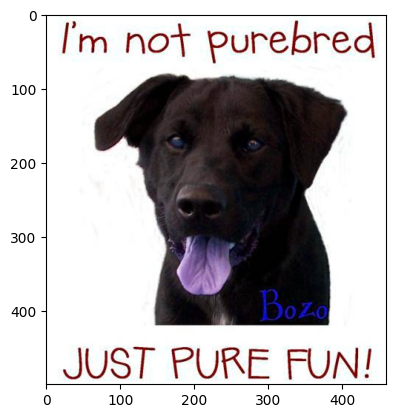

In [18]:
import matplotlib.pyplot as plt

plt.imshow(img_arr)
plt.show()

## 이미지 색상 변환

- RGB 순서로 변경하기

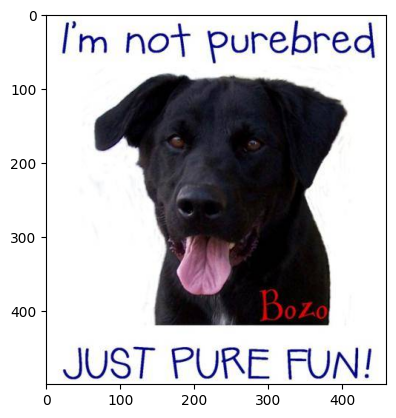

In [19]:
# 변환하고자 하는 이미지 배열과 어떻게 변환할 지에 대한 상수 값을 전달
rgb_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_arr)
plt.show()

- 흑백 이미지로 변환

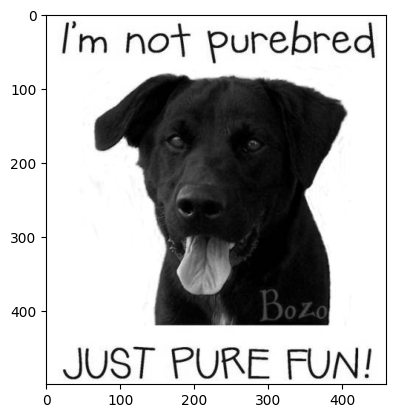

In [78]:
gray_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_arr, cmap="gray")
plt.show()

- 이미지 흑백으로 불러오기

In [79]:
gray_arr = cv2.imread(train[0], cv2.IMREAD_GRAYSCALE)
gray_arr.shape

(500, 460)

## 이미지 저장하기

In [80]:
cv2.imwrite("gray.jpg", gray_arr)

True

## 이미지 밝기 조절

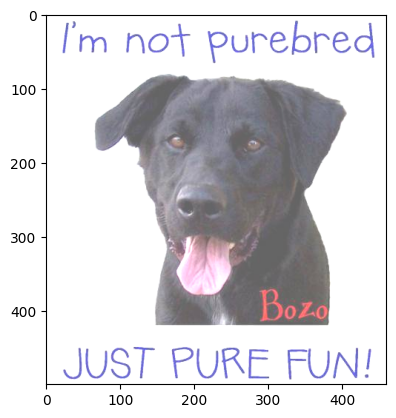

In [81]:
tmp = cv2.add(rgb_arr, (100, 100, 100)) # 밝기 증가
plt.imshow(tmp)
plt.show()

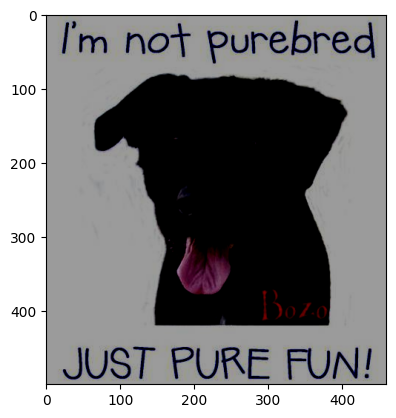

In [82]:
tmp = cv2.subtract(rgb_arr, (100, 100, 100)) # 밝기 감소
plt.imshow(tmp)
plt.show()

## 이미지 리사이징

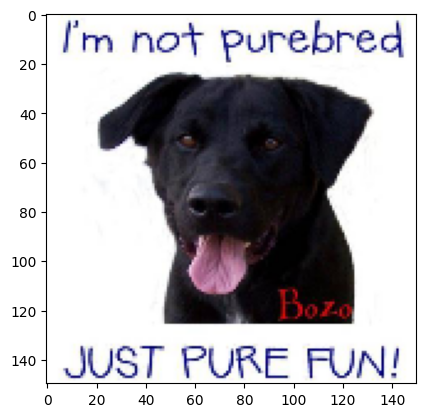

In [83]:
resized_arr = cv2.resize(rgb_arr, (150, 150))
plt.imshow(resized_arr)
plt.show()

## 이미지 crop
- ndarray이므로 슬라이싱하면 됨
> ex. `[h_min:h_max, w_min:w_max]`

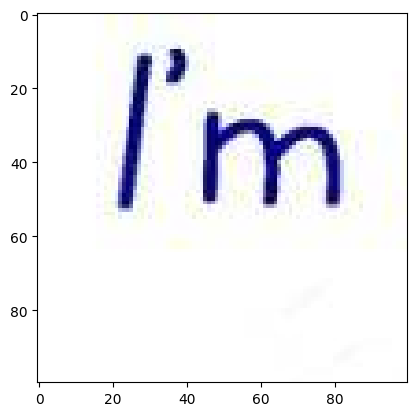

In [84]:
plt.imshow(rgb_arr[:100, :100])
plt.show()

- 중앙 부분 crop 하기

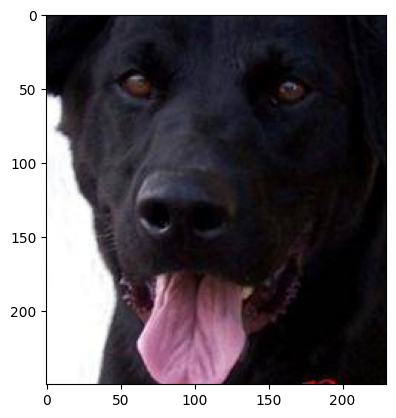

In [85]:
h_min = rgb_arr.shape[0] // 4 # 높이 1/4 지점
w_min = rgb_arr.shape[1] // 4 # 넓이 1/4 지점

plt.imshow(rgb_arr[h_min:h_min * 3, w_min:w_min * 3])
plt.show()

## 이미지 회전

In [86]:
cv2.ROTATE_180 # 180도 회전

1

In [87]:
cv2.ROTATE_90_CLOCKWISE # 시계방향 90도 회전

0

In [88]:
cv2.ROTATE_90_COUNTERCLOCKWISE # 반시계방향 90도 회전

2

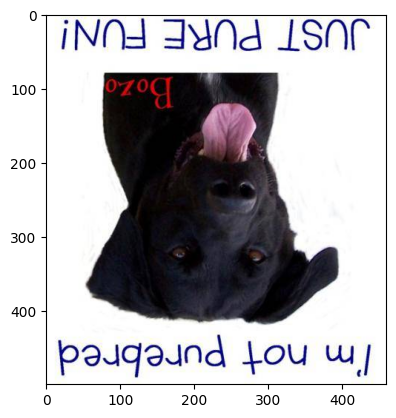

In [89]:
tmp = cv2.rotate(rgb_arr, cv2.ROTATE_180)
plt.imshow(tmp)
plt.show()

## 이미지 색상 반전

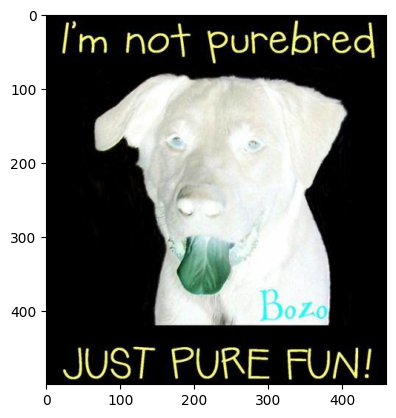

In [90]:
tmp = cv2.bitwise_not(rgb_arr)
plt.imshow(tmp)
plt.show()

## 이미지 상하 반전, 좌우 반전
- flip 함수
    - 두 번째 인수로 0 전달: 상하 반전, 1 전달: 좌우 반전

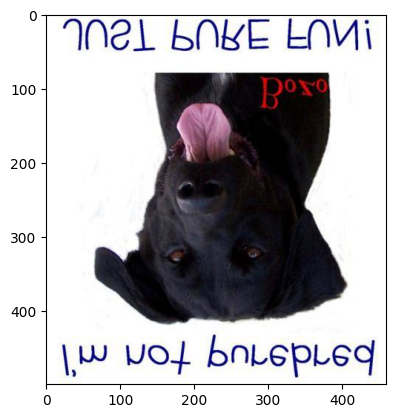

In [91]:
tmp = cv2.flip(rgb_arr, 0) # 상하 반전
plt.imshow(tmp)
plt.show()

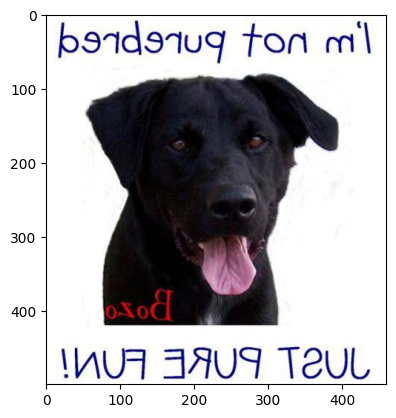

In [92]:
tmp = cv2.flip(rgb_arr, 1) # 좌우 반전
plt.imshow(tmp)
plt.show()

# pillow
- 이미지 분석 및 처리를 쉽게 해주는 라이브러리
- 설치
```bash
pip install pillow
```

In [93]:
from PIL import Image

## 읽기
- open 함수 사용
    -

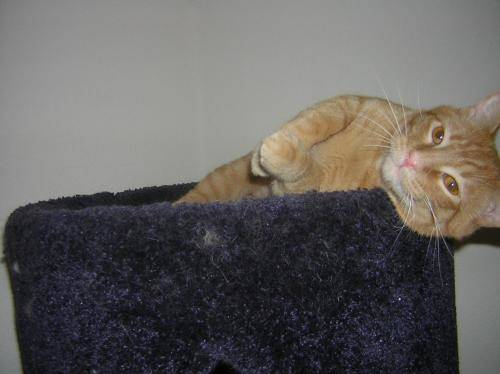

In [94]:
pil_img = Image.open(train[2])
pil_img

In [95]:
type(pil_img)

PIL.JpegImagePlugin.JpegImageFile

- ndarray 변환하기

In [96]:
arr = np.array(pil_img)
arr.shape, arr.dtype

((374, 500, 3), dtype('uint8'))

- ndarray to pil 이미지 객체

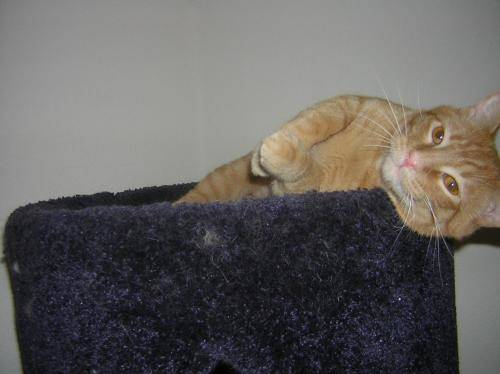

In [97]:
Image.fromarray(arr)

## 리사이징

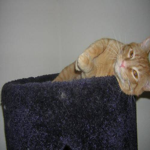

In [98]:
pil_img.resize([150, 150])

## crop
- crop 메서드 사용
    - 인수로 좌표를 전달

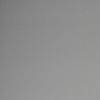

In [99]:
pil_img.crop([0, 0, 100, 100])

- 중앙 crop하기

In [100]:
height, width, _ = np.array(pil_img).shape
height, width

(374, 500)

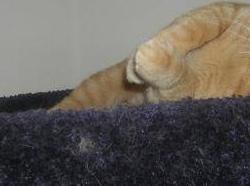

In [101]:
xy = [width // 4, height // 4, width // 4 * 3, height // 4 * 3]
pil_img.crop(xy)

## 이미지 회전

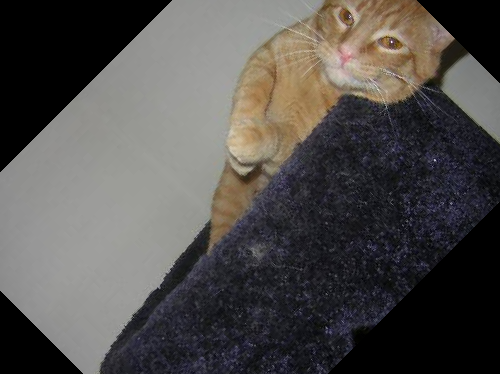

In [102]:
pil_img.rotate(45)

## grayscale 변환

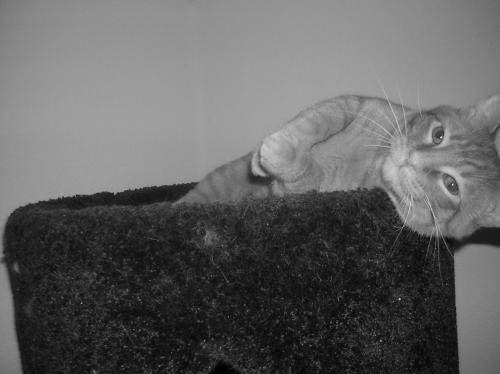

In [103]:
from PIL import ImageOps

ImageOps.grayscale(pil_img)

## 이미지 히스토그램 균등화

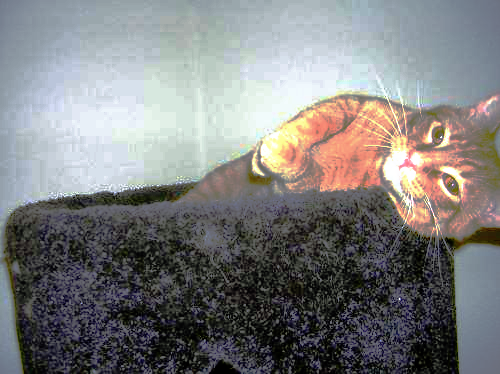

In [104]:
ImageOps.equalize(pil_img)

## 색상 반전

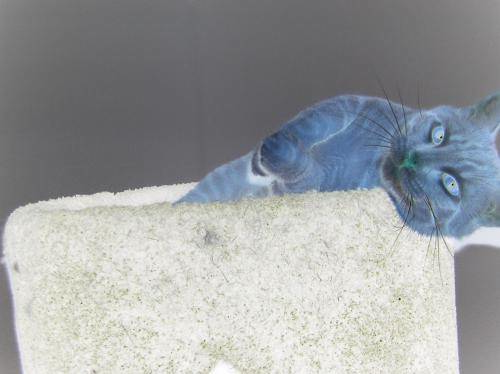

In [105]:
ImageOps.invert(pil_img)

## 좌우반전

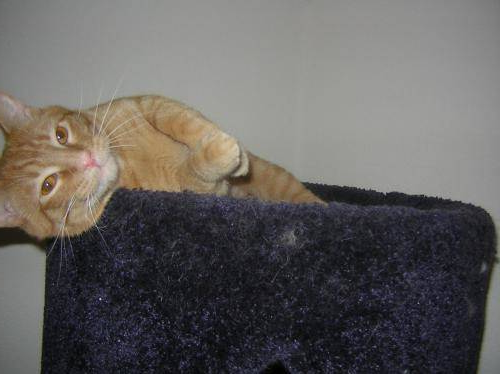

In [106]:
ImageOps.mirror(pil_img)

## 상하반전

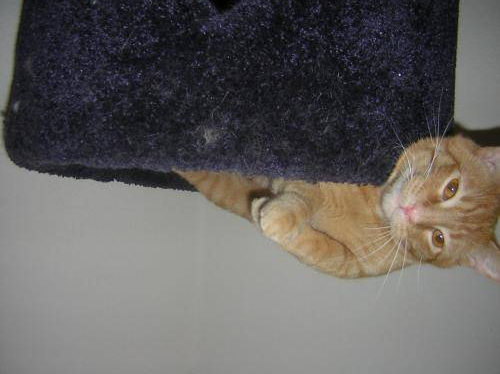

In [107]:
ImageOps.flip(pil_img)

## 이미지 포스터화
- bits 파라미터
    - 0~8 범위 전달. 낮을수록 포스터화 심해짐

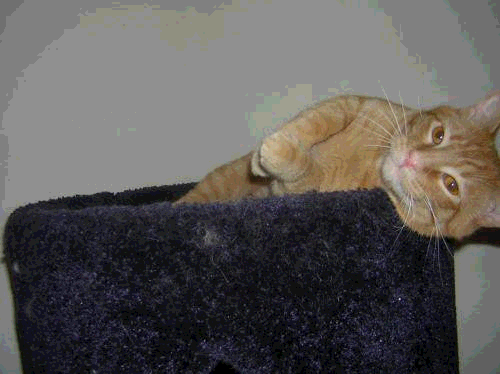

In [108]:
ImageOps.posterize(pil_img, bits=4)

## ImageEnhance 모듈
- ImageEnhance 모듈의 클래스들은 공통적으로 pillow 이미지 객체를 전달받음
- ImageEnhance 모듈의 클래스 객체들은 enhance 메서드 사용
    - 1 기준으로 값이 커질수록 이미지에 대한 효과 강도가 커짐

### 이미지 밝기

In [109]:
from PIL import ImageEnhance

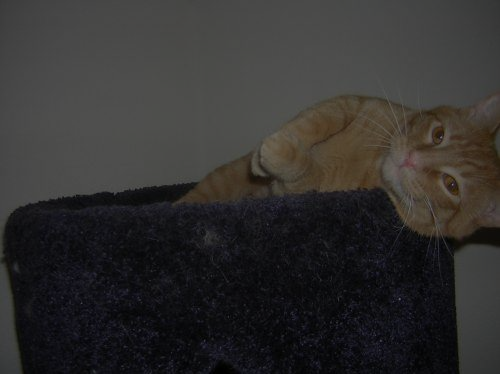

In [110]:
eh_obj = ImageEnhance.Brightness(pil_img)
eh_obj.enhance(.5)

### 이미지 채도

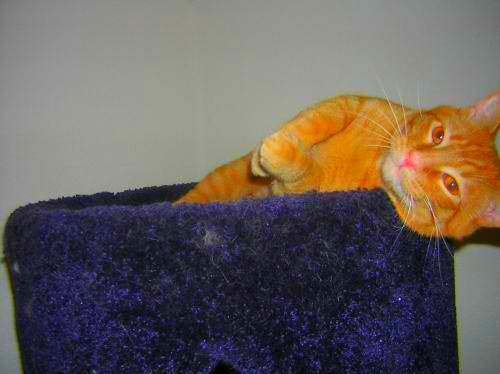

In [111]:
eh_obj = ImageEnhance.Color(pil_img)
eh_obj.enhance(3)

### 이미지 샤프닝

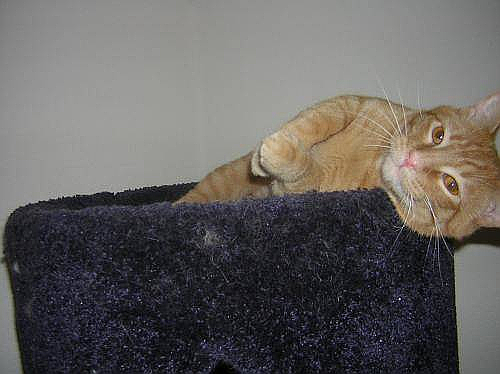

In [112]:
eh_obj = ImageEnhance.Sharpness(pil_img)
eh_obj.enhance(3)

### 이미지 대비

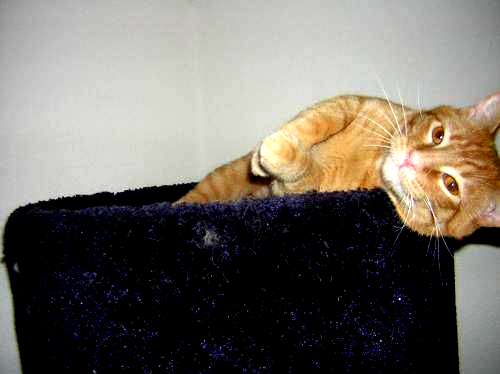

In [113]:
eh_obj = ImageEnhance.Contrast(pil_img)
eh_obj.enhance(2)

## ImageFilter 모듈
- ImageFilter 모듈 클래스의 첫 번째 인수로 0 보다 큰 수 전달
    - 전달한 인수 값이 클수록 효과 증가

In [114]:
from PIL import ImageFilter

### 블러 효과

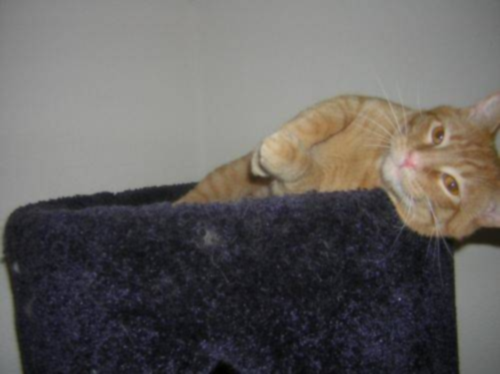

In [115]:
filter_obj = ImageFilter.GaussianBlur(1)
pil_img.filter(filter_obj)

### 이미지의 흑백 윤곽선

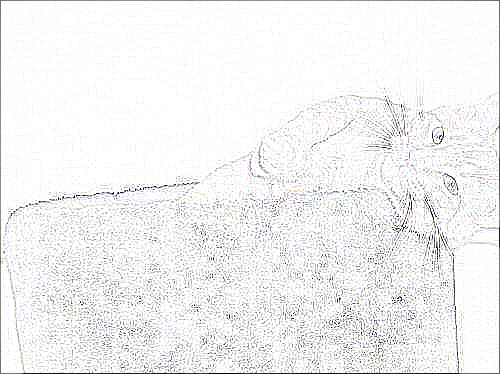

In [116]:
filter_obj = ImageFilter.CONTOUR
pil_img.filter(filter_obj)

### 이미지 디테일

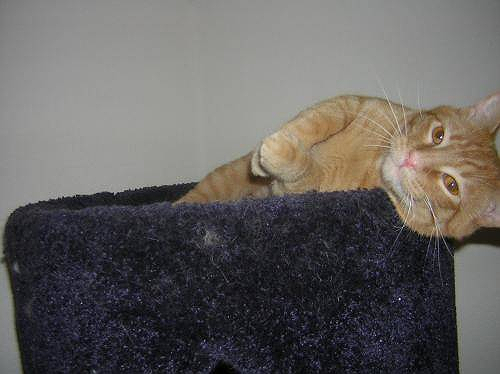

In [117]:
filter_obj = ImageFilter.DETAIL
pil_img.filter(filter_obj)

### 이미지 엣지 강조

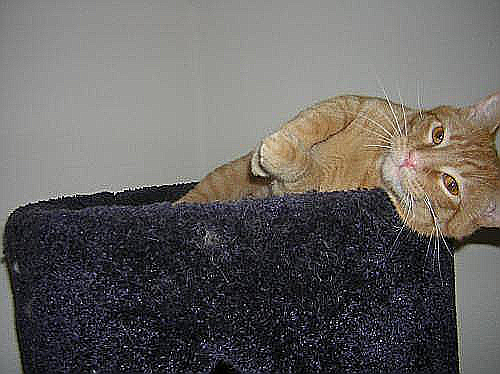

In [118]:
filter_obj = ImageFilter.EDGE_ENHANCE
pil_img.filter(filter_obj)

In [119]:
# pil_img.save("kjh.jpg") # 이미지 저장

# 데이터셋 클래스

In [120]:
train

array(['train/dogs/dog.900.jpg', 'train/dogs/dog.314.jpg',
       'train/cats/cat.232.jpg', ..., 'train/dogs/dog.59.jpg',
       'train/cats/cat.169.jpg', 'train/dogs/dog.54.jpg'], dtype='<U22')

In [121]:
target = target.reshape(-1,1)
target.shape

(2000, 1)

In [122]:
class CatDogDataset(torch.utils.data.Dataset):
    def __init__(self, x, y=None, resize=(150, 150)):
        self.x = x
        self.y = y
        self.resize = resize

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        item = {}
        x = cv2.imread(self.x[idx])
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
        x = cv2.resize(x, self.resize)
        x = x / 255 # 스케일링
        item["x"] = torch.Tensor(x)

        if self.y is not None:
            item["y"] = torch.Tensor(self.y[idx])

        return item

In [123]:
dataset = CatDogDataset(train, target)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)
batch = next(iter(dataloader))
batch["x"].shape

torch.Size([1, 150, 150, 3])

# Conv2d 클래스
- in_channels: input의 채널 개수
- out_channels: output의 채널 개수
- kernel_size: 필터 크기
- stride: kernel을 얼마만큼씩 이동하면서 적용할 것인가 (Default: 1)
- padding: 얼마만큼 padding할 것인가 (Default: 0)
- 입력 텐서 shape
    - batch, channel, height, width

In [124]:
batch["x"].shape # batch, width, height, channel

torch.Size([1, 150, 150, 3])

In [125]:
# batch, width, height, channel -> batch, channel, height, width
x = batch["x"].permute(0, 3, 1, 2)
x.shape

torch.Size([1, 3, 150, 150])

In [126]:
conv2d = torch.nn.Conv2d(3, 6, 5)
x = conv2d(x)
x.shape # batch, channel, width, height

torch.Size([1, 6, 146, 146])

# MaxPool2d 클래스
- 최대값 풀링
- 첫 번째 파라미터가 커널사이즈를 의미
    - stride 파라미터 생략 시 커널사이즈에 전달한 값으로 사용

In [127]:
pool2d = torch.nn.MaxPool2d(2)
pool2d(x).shape

torch.Size([1, 6, 73, 73])

# AvgPool2d 클래스
- 평균 풀링

In [128]:
pool2d = torch.nn.AvgPool2d(2)
x = pool2d(x)
x.shape

torch.Size([1, 6, 73, 73])

# 글로벌 풀링

In [129]:
global_pool2d = torch.nn.AdaptiveAvgPool2d(1)
cnn_output = global_pool2d(x)
cnn_output.shape

torch.Size([1, 6, 1, 1])

In [130]:
# batch, channel, weight, width -> batch, channel * height * width
flatten = torch.nn.Flatten()
flatten(cnn_output).shape

torch.Size([1, 6])

# 모델 클래스

In [131]:
# class Net(torch.nn.Module):
#     def __init__(self, in_channels=3, out_channels=16, kernel_size=3):
#         super().__init__()
#         self.seq = torch.nn.Sequential(
#             torch.nn.Conv2d(in_channels, out_channels, kernel_size),
#             torch.nn.LeakyReLU(),
#             torch.nn.MaxPool2d(2),
#             torch.nn.Conv2d(out_channels, out_channels * 2, kernel_size),
#             torch.nn.LeakyReLU(),
#             torch.nn.MaxPool2d(2),

#             torch.nn.AdaptiveAvgPool2d(1), # batch, channel, 1,1
#             torch.nn.Flatten(), # batch, channel, 1, 1 -> batch, channel
#             torch.nn.Linear(out_channels * 2, 1)
#         )

#     def forward(self, x):
#         return self.seq(x.permute(0, 3, 1, 2))

In [132]:
class Conv2dNet(torch.nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super().__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels, out_channels, kernel_size),
            torch.nn.BatchNorm2d(out_channels),
            torch.nn.LeakyReLU(),
            torch.nn.MaxPool2d(2)
        )

    def forward(self, x):
        return self.seq(x)

In [133]:
class Net(torch.nn.Module):
    def __init__(self, in_channels=3, out_channels=16, kernel_size=3):
        super().__init__()
        self.seq = torch.nn.Sequential(
            Conv2dNet(in_channels, out_channels, kernel_size),
            Conv2dNet(out_channels, out_channels * 2, kernel_size),
            Conv2dNet(out_channels * 2, out_channels * 4, kernel_size),
            Conv2dNet(out_channels * 4, out_channels * 8, kernel_size),
            torch.nn.AdaptiveMaxPool2d(1), # batch, channel, 1, 1
            torch.nn.Flatten(), # batch, channel
            torch.nn.Dropout(0.2),
            torch.nn.Linear(out_channels * 8, 1)
        )

    def forward(self, x):
        return self.seq(x.permute(0, 3, 1, 2))

In [134]:
model = Net()
model(batch["x"])

tensor([[1.0779]], grad_fn=<AddmmBackward0>)

In [135]:
def train_loop(dataloader, model, loss_function, optimizer, device):
    epoch_loss = 0
    model.train()

    for batch in dataloader:
        pred = model(batch["x"].to(device))
        loss = loss_function(pred, batch["y"].to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(dataloader)
    return epoch_loss

In [136]:
@torch.no_grad()
def test_loop(dataloader, model, loss_function, device):
    epoch_loss = 0
    model.eval()

    act = torch.nn.Sigmoid()
    pred_list = []
    for batch in dataloader:
        pred = model(batch["x"].to(device))
        if batch.get("y") is not None:
            loss = loss_function(pred, batch["y"].to(device))
            epoch_loss += loss.item()

        pred = act(pred)
        pred = pred.to("cpu").numpy()
        pred_list.append(pred)

    pred = np.concatenate(pred_list)
    epoch_loss /= len(dataloader)

    return epoch_loss, pred

# 하이퍼파라미터

In [137]:
n_splits = 5
batch_size = 32
epochs = 100
loss_function = torch.nn.BCEWithLogitsLoss()

In [138]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

cv = KFold(n_splits, shuffle=True, random_state=SEED)

In [139]:
is_holdout = False
reset_seeds(SEED)
score_list = []

for i, (tri, vai) in enumerate(cv.split(train)):
    model = Net().to(device)
    optimizer = torch.optim.Adam(model.parameters())

    train_dataset = CatDogDataset(train[tri], target[tri])
    train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    valid_dataset = CatDogDataset(train[vai], target[vai])
    valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

    best_score = 0
    patience = 0

    for epoch in range(epochs):
        train_loss = train_loop(train_dataloader, model, loss_function, optimizer, device)
        valid_loss, pred = test_loop(valid_dataloader, model, loss_function, device)
        pred = (pred > 0.5).astype(int)
        score = accuracy_score(target[vai], pred)

        print(train_loss, valid_loss, score)
        patience += 1
        if score > best_score:
            patience = 0
            best_score = score
            torch.save(model.state_dict(), f"model_{i}.pt")

        if patience == 5:
            break

    print(f"Fold-{i} Best Acc: {best_score}")
    score_list.append(best_score)

    if is_holdout:
        break

0.6880498516559601 0.6599895082987272 0.585
0.6073583340644837 0.8691677680382361 0.535
0.551272104382515 0.5325367977985969 0.7275
0.49326313972473146 0.6782151873295124 0.675
0.46705416321754456 0.773601926290072 0.595
0.414761883020401 0.6347959775191087 0.7
0.3776474618911743 0.4935093980569106 0.75
0.3626933127641678 0.47782047666036165 0.7625
0.30752385705709456 0.4951623036311223 0.7775
0.2676825073361397 0.48000788459411037 0.78
0.2179632380604744 0.37885491206095767 0.8325
0.2053723579645157 0.5260082231118128 0.78
0.1693272213637829 0.5147533852320451 0.775
0.17065597131848334 0.46942974627017975 0.8025
0.1567620884627104 0.41274031079732454 0.8
0.12514345027506352 0.4115405415113156 0.81
Fold-0 Best Acc: 0.8325
0.7381062364578247 0.6628345801280096 0.62
0.6487373983860016 0.6351310198123639 0.645
0.6219300270080567 0.6164087102963374 0.66
0.5673527389764785 0.7645227679839501 0.58
0.5269346648454666 0.6496631938677567 0.665
0.49773438572883605 0.5430374626929944 0.72
0.44186

In [140]:
score_list

[0.8325, 0.82, 0.8, 0.7775, 0.8325]